

questions
1. for 1.1 and 1.2, seems like the answer is in the code. for 1.3 and 1.4 though, does the response go in the pdf? or a text block in this file


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def compute_cost(x, y, theta):
  # calculating Y'; this will change as w changes
  predictions = x.dot(theta)

  # Y' - y
  errors = np.subtract(predictions, y)

  # (Y' - y)^2
  sqr_errors = np.square(errors)

  # the summation and multiplication steps of loss formula
  L = 1/(2*m) * np.sum(sqr_errors)

  return L

In [ ]:
def gradient_descent(x, y, theta, alpha, iterations):
  m = len(y)
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    # Y'
    predictions = x.dot(theta) # number of variables in x must match number of thetas

    # Y' - y
    errors = np.subtract(predictions, y)

    # dL/dw; performs (Y' - y)*Xn summation and then divides by m
    sum_delta = (1/m)*x.transpose().dot(errors)

    # w(t+1) = w(t) - a*dL/dw
    theta -= alpha*sum_delta

    # store cost of current theta values
    cost_history[i] = compute_cost(x, y, theta)

  return theta, cost_history

In [ ]:
# load data
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/D3.csv'
df = pd.read_csv(url)

# print(df.head())

In [ ]:
# store length of data
m = len(df)

# print(m)

# separate columns
x1 = df.values[:,0]
x2 = df.values[:,1]
x3 = df.values[:,2]
y = df.values[:,3]

# print('x1 = ', x1[:5])
# print('x2 = ', x2[:5])
# print('x3 = ', x3[:5])
# print('y = ', y[:5])

100


In [ ]:
# create/reshape variable arrays into 2d arrays
x0 = np.ones((m,1))
x1 = x1.reshape(m,1)
x2 = x2.reshape(m,1)
x3 = x3.reshape(m,1)

# new array containing x0's as the first column and x1's as the second
x01 = np.hstack((x0, x1))
x02 = np.hstack((x0, x2))
x03 = np.hstack((x0, x3))

# 1.1 Linear models for individual explanatory variables

In [ ]:
theta = np.zeros(2)
iterations = 4500
alpha = 0.01

theta1, cost_history1 = gradient_descent(x01, y, theta, alpha, iterations)
print(f'theta for x1 = {theta1}')
print(f'cost history for x1 = {cost_history1}')
print()

theta2, cost_history2 = gradient_descent(x02, y, theta, alpha, iterations)
print(f'theta for x2 = {theta2}')
print(f'cost history for x2 = {cost_history2}')
print()

theta3, cost_history3 = gradient_descent(x03, y, theta, alpha, iterations)
print(f'theta for x3 = {theta3}')
print(f'cost history for x3 = {cost_history3}')
print()

theta for x1 = [ 5.92767927 -2.03823168]
cost history for x1 = [5.48226715 5.44290965 5.40604087 ... 0.98499309 0.98499309 0.98499309]

theta for x2 = [0.73630934 0.55751073]
cost history for x2 = [8.06081776 7.95204285 7.85434384 ... 3.59936603 3.59936603 3.59936603]

theta for x3 = [ 2.8713337  -0.52044792]
cost history for x3 = [4.3886359  4.37142475 4.35588589 ... 3.62945113 3.62945113 3.62945113]



# 1.2 Plotting final regression models and loss over iterations for each explanatory variable

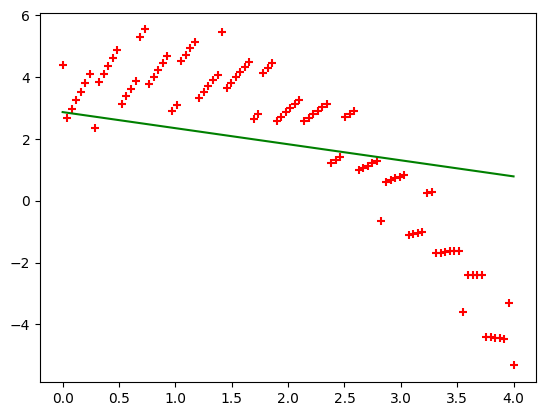

In [ ]:
# final regression model for x1
plt.scatter(x01[:,1], y, color='red', marker='+')

x1_predictions = x01.dot(theta1)
plt.plot(x01[:,1], x1_predictions, color='green')

plt.show()

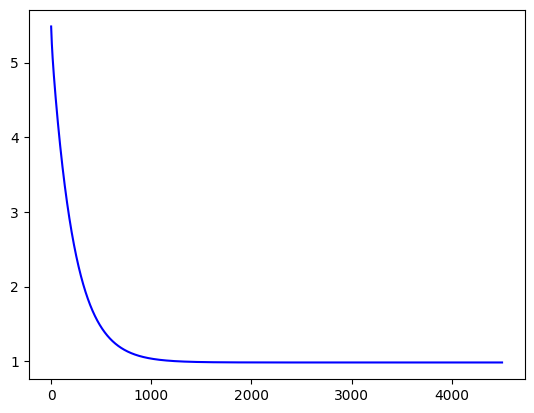

In [ ]:
# loss function for x1 over iterations
plt.plot(range(1, iterations+1), cost_history1, color='blue')

plt.show()

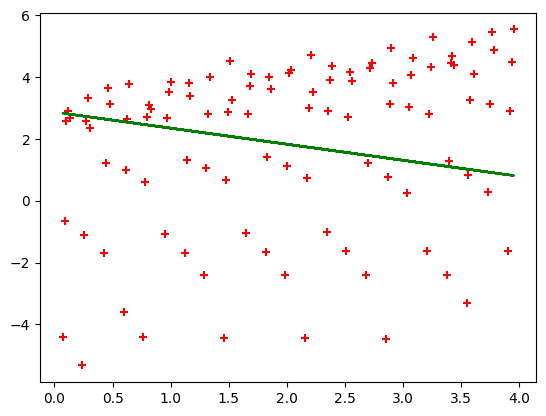

In [ ]:
# final regression model for x2
plt.scatter(x02[:,1], y, color='red', marker='+')

x2_predictions = x02.dot(theta2)
plt.plot(x02[:,1], x2_predictions, color='green')

plt.show()

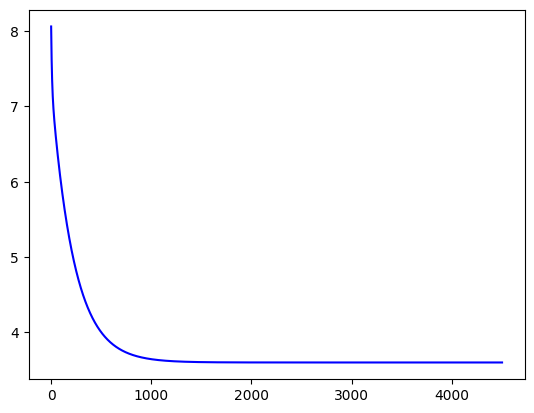

In [ ]:
# loss function for x2 over iterations
plt.plot(range(1, iterations+1), cost_history2, color='blue')

plt.show()

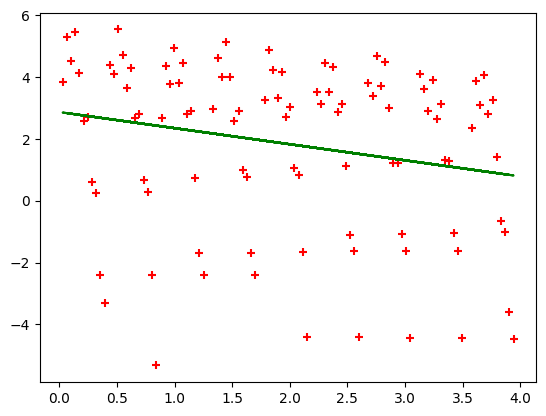

In [ ]:
# final regression model for x3
plt.scatter(x03[:,1], y, color='red', marker='+')

x3_predictions = x03.dot(theta3)
plt.plot(x03[:,1], x3_predictions, color='green')

plt.show()

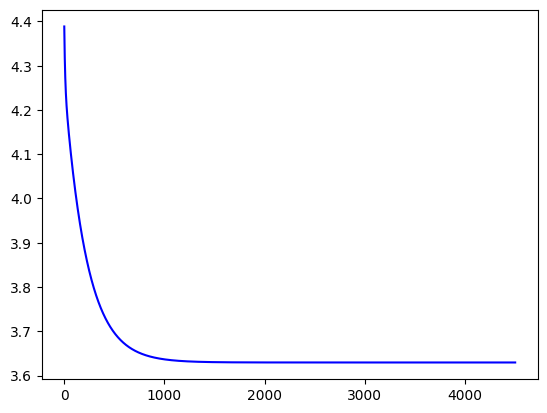

In [ ]:
# loss function for x3 over iterations
plt.plot(range(1, iterations+1), cost_history3, color='blue')

plt.show()

# Problem 2

In [ ]:
# recall that explanatory variables have already been separated into x0, x1, x2, x3

# new array containing all 4 x's
x = np.hstack((x0, x1, x2, x3))

array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.1349495 , 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545454],
       [1.        , 0.16161616, 2.21979798, 2.23393939],
       [1.        , 0.2020202 , 2.91474747, 2.68242424],
       [1.        , 0.24242424, 3.60969697, 3.13090909],
       [1.        , 0.28282828, 0.30464646, 3.57939394],
       [1.        , 0.32323232, 0.99959596, 0.02787879],
       [1.        , 0.36363636, 1.69454546, 0.47636364]])

# 2.1 Linear model

In [ ]:
# 4 thetas for 4 variables
theta = np.zeros(4)
iterations = 1500
alpha = 0.01

theta, cost_history = gradient_descent(x, y, theta, alpha, iterations)
print(f'thetas = {theta}')
print(f'cost history = {cost_history}')
print()

thetas = [ 4.15118728 -1.8394291   0.72473856 -0.09513266]
cost history = [5.21542243 4.97171977 4.7765543  ... 0.81079843 0.81065429 0.81051044]



# 2.2 Loss over iterations

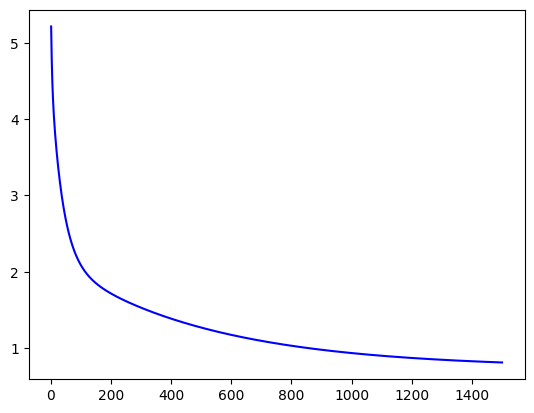

In [ ]:
plt.plot(range(1, iterations+1), cost_history, color='blue')

plt.show()

# 2.4 Predicting Y values for new X values

In [ ]:
# set up matrix for new data
new_data = [[1, 1, 1], [2, 0, 4], [3, 2, 1]]
x0 = np.ones((3, 1))
new_data = np.hstack((x0, new_data))

# run prediction using thetas calculated from gradient descent
predictions = new_data.dot(theta)

print(f'Using thetas: {theta}\n')
print(f'Prediction for (1, 1, 1): Y = {predictions[0]}')
print(f'Prediction for (2, 0, 4): Y = {predictions[1]}')
print(f'Prediction for (3, 2, 1): Y = {predictions[2]}')

Using thetas: [ 4.15118728 -1.8394291   0.72473856 -0.09513266]

Prediction for (1, 1, 1): Y = 2.9413640816645295
Prediction for (2, 0, 4): Y = 0.09179843075891547
Prediction for (3, 2, 1): Y = -0.012755552822328653
